In [1]:
# William Nourse
# Jan 28 2021

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from ipywidgets import interact_manual
#%matplotlib widget

In [2]:
# Variables
Cm = 10 # nF
Gm = 1 # uS
Iapp = 20 # nA
Er = -60 # mV
R = 20 # mV
gSyn = 0.5 # uS
Esyn = 0 # mV

dt = 0.01 # ms
tmax = 100 # ms

t = np.arange(0,tmax,dt)
numSteps = np.size(t)

Text(0.5, 1.0, '2 Neurons')

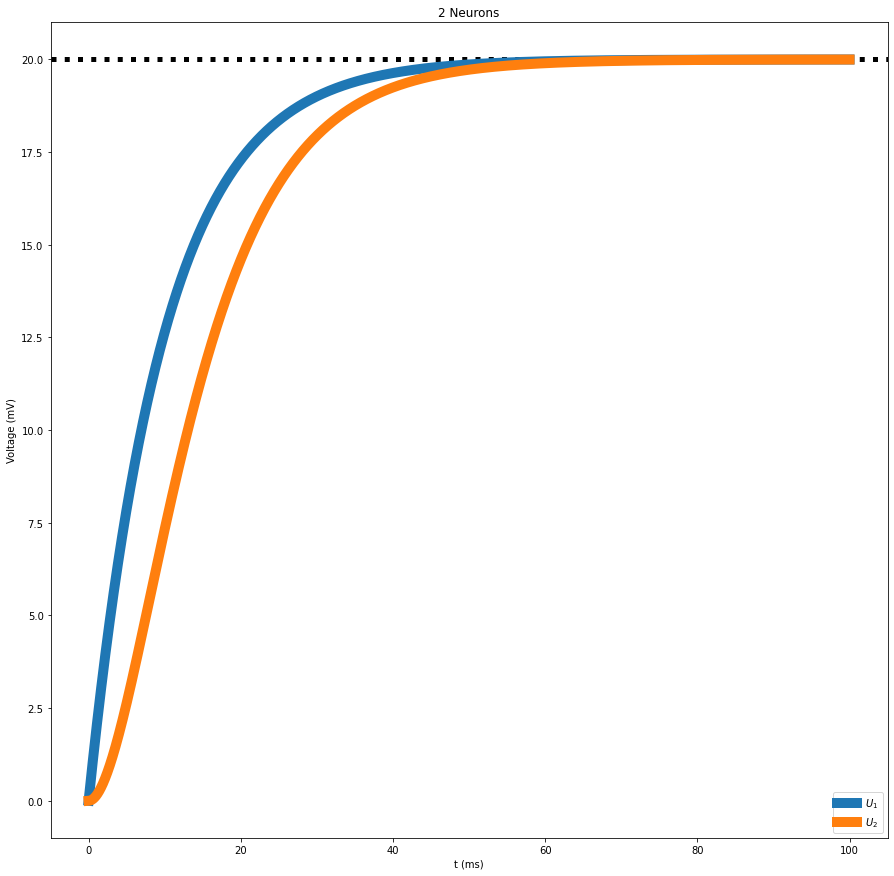

In [3]:
# Compute U1(t) and U2(t) with simulation
U1sim = np.zeros(np.size(t))
U2sim = np.zeros(np.size(t))

delEsyn = Esyn - Er # mV

for i in range(1,numSteps):
    U1sim[i] = U1sim[i-1] + dt/Cm*(Iapp - Gm*U1sim[i-1])
    g = U1sim[i-1]/R*gSyn
    U2sim[i] = U2sim[i-1] + dt/Cm*(g*(delEsyn - U2sim[i-1]) - Gm*U2sim[i-1])
    
# Plot
plt.figure(figsize=(15,15))
plt.axhline(y=Iapp,linestyle=':',color='k',linewidth=5)
plt.plot(t,U1sim,label="$U_1$",linewidth=10)
plt.plot(t,U2sim,label="$U_2$",linewidth=10)
plt.legend()
plt.ylabel('Voltage (mV)')
plt.xlabel('t (ms)')
plt.title('2 Neurons')

In [4]:
# Compute U1(t) and U2(t) with simulation interactively

def varyEsyn(Esyn=0.0):
    U1sim = np.zeros(np.size(t))
    U2sim = np.zeros(np.size(t))

    delEsyn = Esyn - Er # mV

    for i in range(1,numSteps):
        U1sim[i] = U1sim[i-1] + dt/Cm*(Iapp - Gm*U1sim[i-1])
        gSyn = U1sim[i-1]/R*gMax
        U2sim[i] = U2sim[i-1] + dt/Cm*(gSyn*(delEsyn - U2sim[i-1]) - Gm*U2sim[i-1])

    # Plot
    plt.figure(figsize=(15,15))
    plt.axhline(y=Iapp,linestyle=':',color='k',linewidth=5)
    plt.plot(t,U1sim,label="$U_1$",linewidth=10)
    plt.plot(t,U2sim,label="$U_2$",linewidth=10)
    plt.legend()
    plt.ylabel('Voltage (mV)')
    plt.xlabel('t')
    plt.title('2 Neuron')
    return

interact_manual(varyEsyn,Esyn=(-100.0,100.0))

interactive(children=(FloatSlider(value=0.0, description='Esyn', min=-100.0), Button(description='Run Interact…

<function __main__.varyEsyn(Esyn=0.0)>